In [24]:
import numpy as np
import pandas as pd
import plotly.graph_objs as go
from chart_studio.plotly import plot, iplot
import cufflinks as cf
cf.go_offline(connected=True)

In [25]:
de_rm_df = pd.read_csv('../data/kospi/preprocessed/de_rm_df.csv',index_col=0)
monthly_df = pd.read_csv('../data/similarity/monthly_cosine_df.csv',index_col=0)

## Figure 7 Event time Returns

This figure plots the weighted average cumulative abnormal return for the top (highest similarity) and
bottom (lowest similarity) quintile portfolios.

앞에서 Total Document filing dates를 월별로 나눠서 살펴보았을떄 대부분이 3월과 4월에 존재했다. 
참고로 2010,2011,2012년에는 3월과 6월에만 공시가 되었다.

2011년 6월에 최종수치변경되므로 2012년 3월말부터 해본다. 

3월은 2012~2019가 모두 포함된다
4월은 2013,2018,2019 이다.
6월은 2012,2013,2014,2015이다.

In [26]:
ret_df = de_rm_df.loc[20120300:].copy()
sim_df = monthly_df.loc[ret_df.index].copy()

ret_df.shape, sim_df.shape

((1926, 113), (1926, 113))

In [27]:
yyyymmdd_ls = [str(i)[:-2] for i in sim_df.index]
idx_ls = []
for idx in range(0,len(yyyymmdd_ls)-1) : 
    if yyyymmdd_ls[idx] != yyyymmdd_ls[idx+1] : 
        idx_ls.append(idx)
idx_ls.append(-1)

monthly_sim_df = sim_df.iloc[idx_ls]  #월말 기준 유사도 고정한 df
monthly_sim_df.shape

(94, 113)

In [30]:
monthly_sim_df[monthly_sim_df.diff().sum(1) != 0]

,삼양홀딩스,유한양행,CJ대한통운,두산,대림산업,한국테크놀로지그룹,기아차,동아쏘시오홀딩스,SK하이닉스,영풍,...,현대백화점,한국금융지주,GS,하나금융지주,아모레퍼시픽,LF,후성,SK이노베이션,CJ제일제당,KB금융
20120629,0.436818,0.874424,0.798941,0.841013,0.804597,0.856951,0.692892,0.538199,0.532303,0.631874,...,0.863042,0.912822,0.788060,0.963774,0.771359,0.910826,0.788836,0.491008,0.802622,0.950659
20130329,0.436818,0.973009,0.761952,0.914827,0.804597,0.856951,0.692892,0.538199,0.724413,0.631874,...,0.863042,0.912822,1.000000,0.963774,0.771359,0.902730,0.788836,0.491008,0.802622,0.976631
20130430,0.774388,0.973009,0.761952,0.914827,0.931310,0.628641,0.804912,0.842385,0.724413,0.769667,...,0.878047,0.912822,1.000000,0.948461,0.789727,0.902730,0.677898,0.786522,0.927470,0.976631
20130628,0.774388,0.973009,0.761952,0.914827,0.931310,0.628641,0.804912,0.842385,0.724413,0.769667,...,0.878047,0.524325,1.000000,0.948461,0.789727,0.902730,0.677898,0.786522,0.927470,0.976631
20130731,0.774388,0.973009,0.761952,0.914827,0.931310,0.628641,0.804912,0.842385,0.724413,0.769667,...,0.878047,0.524325,1.000000,0.948461,0.789727,0.902730,0.677898,0.786522,0.927470,0.976631
20140331,0.873603,0.886677,0.831403,0.759648,0.923185,0.953634,0.927729,0.761984,0.698583,0.732650,...,0.893905,0.624440,0.884087,0.952865,0.892467,0.536256,0.685722,0.844429,0.936531,0.974787
20140530,0.873603,0.886677,0.831403,0.759648,0.923185,0.953634,0.927729,0.761984,0.698583,0.732650,...,0.893905,0.624440,0.884087,0.952865,0.892467,0.536256,0.685722,0.844429,0.936531,0.974787
20140630,0.873603,0.886677,0.831403,0.759648,0.923185,0.953634,0.927729,0.761984,0.698583,0.732650,...,0.893905,0.624440,0.884087,0.952865,0.892467,0.536256,0.685722,0.844429,0.936531,0.974787
20150331,0.891958,0.929742,0.879101,0.949373,0.936710,0.958416,0.938651,0.652661,0.533306,0.958864,...,0.890258,0.955313,0.620773,0.929024,0.839837,0.983116,0.943338,0.953741,0.888051,0.971678
20150630,0.891958,0.929742,0.879101,0.949373,0.936710,0.958416,0.938651,0.652661,0.533306,0.958864,...,0.890258,0.955313,0.620773,0.929024,0.839837,0.983116,0.943338,0.953741,0.888051,0.971678


In [6]:
def get_q(df_, lower_bound, upper_bound) : #quntile 설정해주면 해당 quantile에 해당하는 boolean값 반환. cross-sectional 기준
    low_q1_threshold = np.percentile(df_,lower_bound,1)
    low_q1_thres_mat = np.repeat(low_q1_threshold[:,np.newaxis],df_.shape[1],1)

    high_q1_threshold = np.percentile(df_,upper_bound,1)
    high_q1_thres_mat = np.repeat(high_q1_threshold[:,np.newaxis],df_.shape[1],1)
    
    low_bool_mat = low_q1_thres_mat > df_
    high_bool_mat1 = high_q1_thres_mat > df_
    
    low_bool_mat = low_q1_thres_mat > df_
    high_bool_mat = high_q1_thres_mat > df_
    
    return np.bitwise_and(high_bool_mat,~low_bool_mat)

In [7]:
march_idx =[ x for x in range(0,94,12)] #3월에 해당되는 idx 추출(2012~2019)
april_idx = [13,73,85] #4월에 해당하는 idx추출(2013,2018,2019)
june_idx = [3,15,27,39] #6월에 해당하는 idx추출(2012~2015)

re_march_idx = [idx_ls[i] for i in range(0,len(idx_ls),12)] #return_df 의 3월말 idx값들 8년치
re_april_idx = [idx_ls[i] for i in april_idx] #4월말부터 
re_june_idx = [idx_ls[i] for i in june_idx] #6월말부터

In [8]:
def get_q_returns(days,idx,re_idx):
    
    q1_march_values = [get_q(monthly_sim_df,0,20).iloc[x,:].values for x in idx] #3월말 값들의 Q1 여부 8년치 (boolean array)
    q2_march_values = [get_q(monthly_sim_df,20,40).iloc[x,:].values for x in idx] #3월말 값들의 Q2 여부 8년치
    q3_march_values = [get_q(monthly_sim_df,40,60).iloc[x,:].values for x in idx] #3월말 값들의 Q3 여부 8년치
    q4_march_values = [get_q(monthly_sim_df,60,80).iloc[x,:].values for x in idx] #3월말 값들의 Q4 여부 8년치
    q5_march_values = [get_q(monthly_sim_df,80,100).iloc[x,:].values for x in idx] #3월말 값들의 Q5 여부 8년치

    q1 = np.mean([((1+ret_df.iloc[i:i+days,:].cumsum())-1).iloc[-1,:][q1_march_values[idx]].mean() for idx,i in enumerate(re_idx)])
    q2 = np.mean([((1+ret_df.iloc[i:i+days,:].cumsum())-1).iloc[-1,:][q2_march_values[idx]].mean() for idx,i in enumerate(re_idx)])
    q3 = np.mean([((1+ret_df.iloc[i:i+days,:].cumsum())-1).iloc[-1,:][q3_march_values[idx]].mean() for idx,i in enumerate(re_idx)])
    q4 = np.mean([((1+ret_df.iloc[i:i+days,:].cumsum())-1).iloc[-1,:][q4_march_values[idx]].mean() for idx,i in enumerate(re_idx)])
    q5 = np.mean([((1+ret_df.iloc[i:i+days,:].cumsum())-1).iloc[-1,:][q5_march_values[idx]].mean() for idx,i in enumerate(re_idx)])
        
    df_ = pd.DataFrame([q1,q2,q3,q4,q5],index=['Q1','Q2','Q3','Q4','Q5'])
    
    return df_

In [9]:
def get_q_returns_for_total(days,idx,re_idx):
    
    q1_march_values = [get_q(monthly_sim_df,0,20).iloc[x,:].values for x in idx] #3월말 값들의 Q1 여부 8년치 (boolean array)
    q2_march_values = [get_q(monthly_sim_df,20,40).iloc[x,:].values for x in idx] #3월말 값들의 Q2 여부 8년치
    q3_march_values = [get_q(monthly_sim_df,40,60).iloc[x,:].values for x in idx] #3월말 값들의 Q3 여부 8년치
    q4_march_values = [get_q(monthly_sim_df,60,80).iloc[x,:].values for x in idx] #3월말 값들의 Q4 여부 8년치
    q5_march_values = [get_q(monthly_sim_df,80,100).iloc[x,:].values for x in idx] #3월말 값들의 Q5 여부 8년치

    q1 = ([((1+ret_df.iloc[i:i+days,:].cumsum())-1).iloc[-1,:][q1_march_values[idx]].mean() for idx,i in enumerate(re_idx)])
    q2 = ([((1+ret_df.iloc[i:i+days,:].cumsum())-1).iloc[-1,:][q2_march_values[idx]].mean() for idx,i in enumerate(re_idx)])
    q3 = ([((1+ret_df.iloc[i:i+days,:].cumsum())-1).iloc[-1,:][q3_march_values[idx]].mean() for idx,i in enumerate(re_idx)])
    q4 = ([((1+ret_df.iloc[i:i+days,:].cumsum())-1).iloc[-1,:][q4_march_values[idx]].mean() for idx,i in enumerate(re_idx)])
    q5 = ([((1+ret_df.iloc[i:i+days,:].cumsum())-1).iloc[-1,:][q5_march_values[idx]].mean() for idx,i in enumerate(re_idx)])
        
    df_ = pd.DataFrame([q1,q2,q3,q4,q5],index=['Q1','Q2','Q3','Q4','Q5'])
    
    return df_

In [10]:
time_index = [str(i) for i in range(0,13)]
ee = pd.DataFrame([0,0,0,0,0],index=['Q1','Q2','Q3','Q4','Q5'])
march_month_df = pd.concat([get_q_returns(i,march_idx,re_march_idx) for i in range(20,260,20)],axis=1)
march_month_df = pd.concat([ee,march_month_df],axis=1).T
march_month_df.index = time_index

In [11]:
april_month_df = pd.concat([get_q_returns(i,april_idx,re_april_idx) for i in range(20,260,20)],axis=1)
april_month_df = pd.concat([ee,april_month_df],axis=1).T
april_month_df.index = time_index

In [12]:
june_month_df = pd.concat([get_q_returns(i,june_idx,re_june_idx) for i in range(20,260,20)],axis=1)
june_month_df = pd.concat([ee,june_month_df],axis=1).T
june_month_df.index = time_index

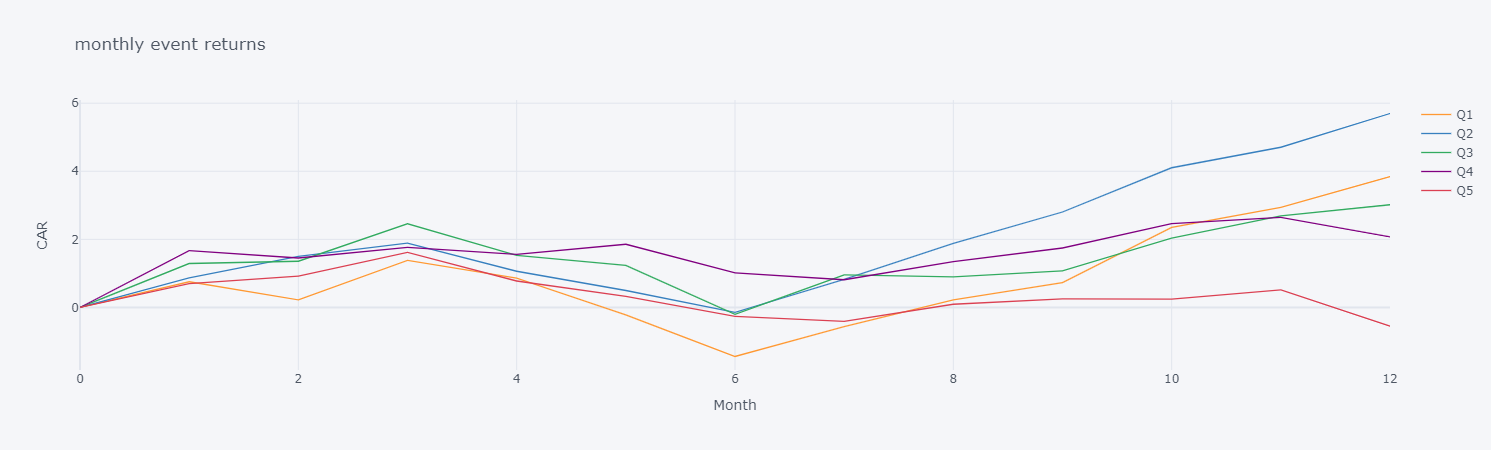

In [13]:
((march_month_df+april_month_df+june_month_df)/3).iplot(kind='line',title='monthly event returns',xTitle='Month', yTitle = 'CAR')

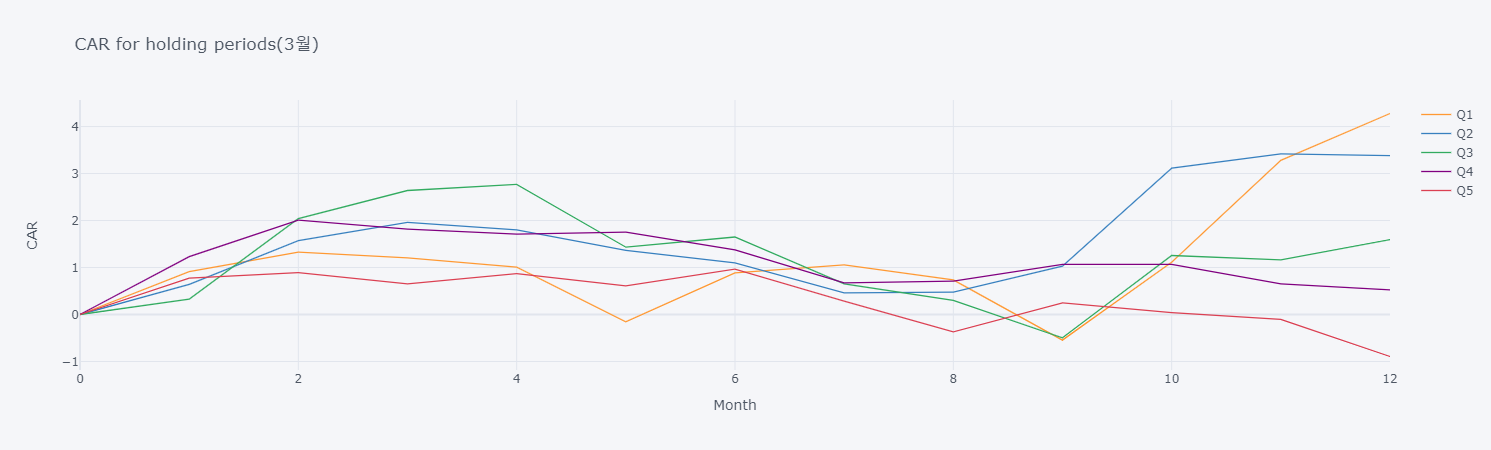

In [32]:
march_month_df.iplot(kind='line',title = 'CAR for holding periods(3월)' ,xTitle='Month', yTitle = 'CAR')

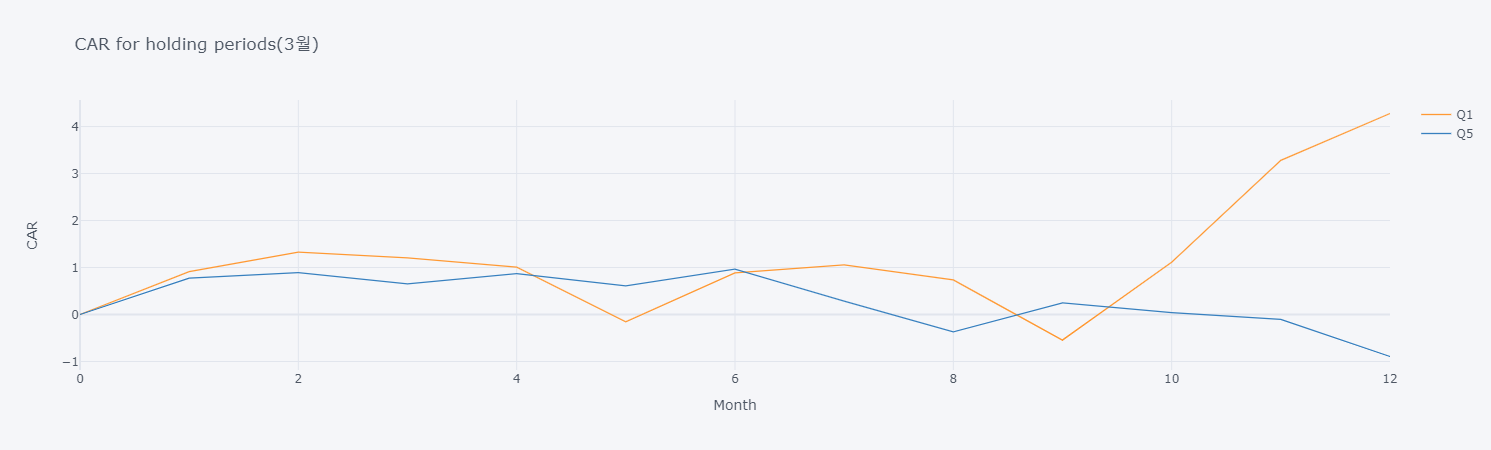

In [31]:
march_month_df.loc[:,['Q1','Q5']].iplot(kind='line',title = 'CAR for holding periods(3월)' ,xTitle='Month', yTitle = 'CAR')

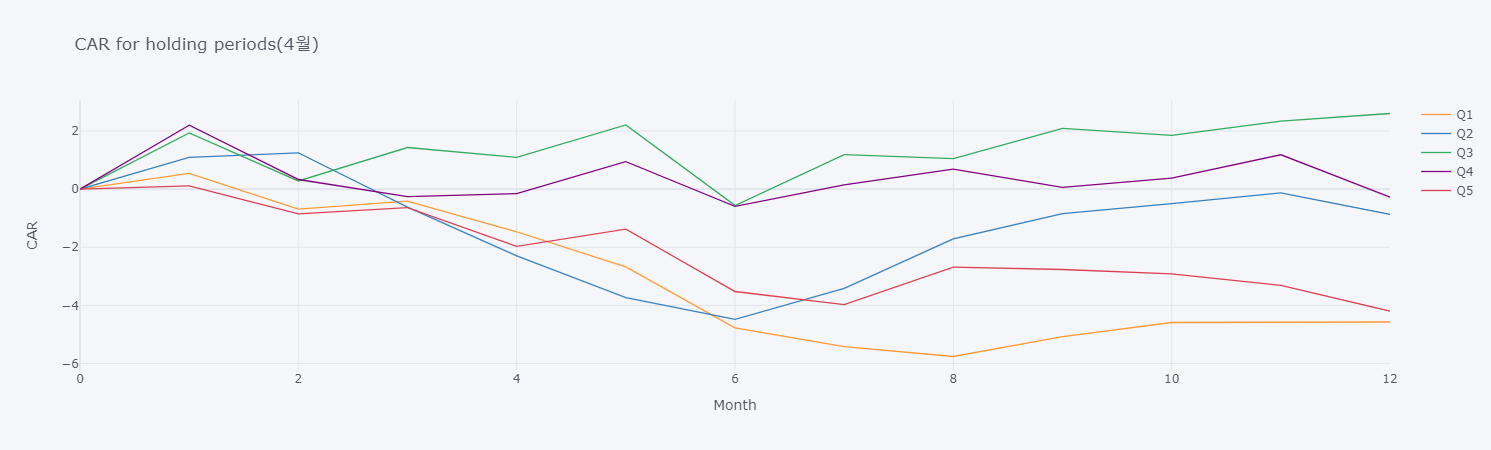

In [28]:
april_month_df.iplot(kind='line',title='CAR for holding periods(4월)' ,xTitle='Month', yTitle = 'CAR')

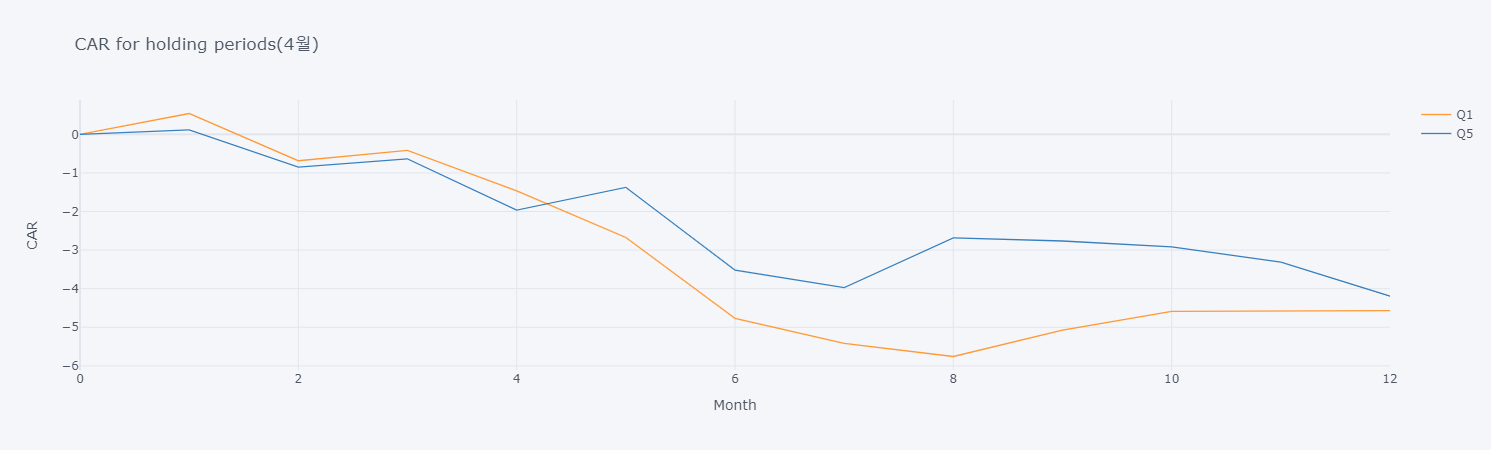

In [16]:
april_month_df.loc[:,['Q1','Q5']].iplot(kind='line',title='CAR for holding periods(4월)' ,xTitle='Month', yTitle = 'CAR')

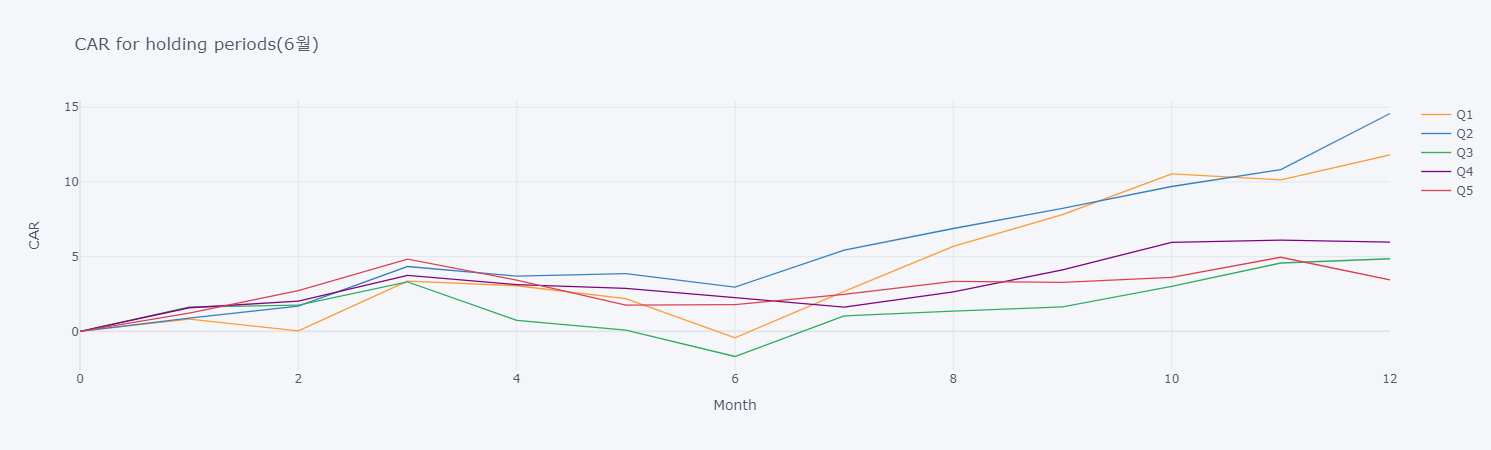

In [17]:
june_month_df.iplot(kind='line',title='CAR for holding periods(6월)' ,xTitle='Month', yTitle = 'CAR')

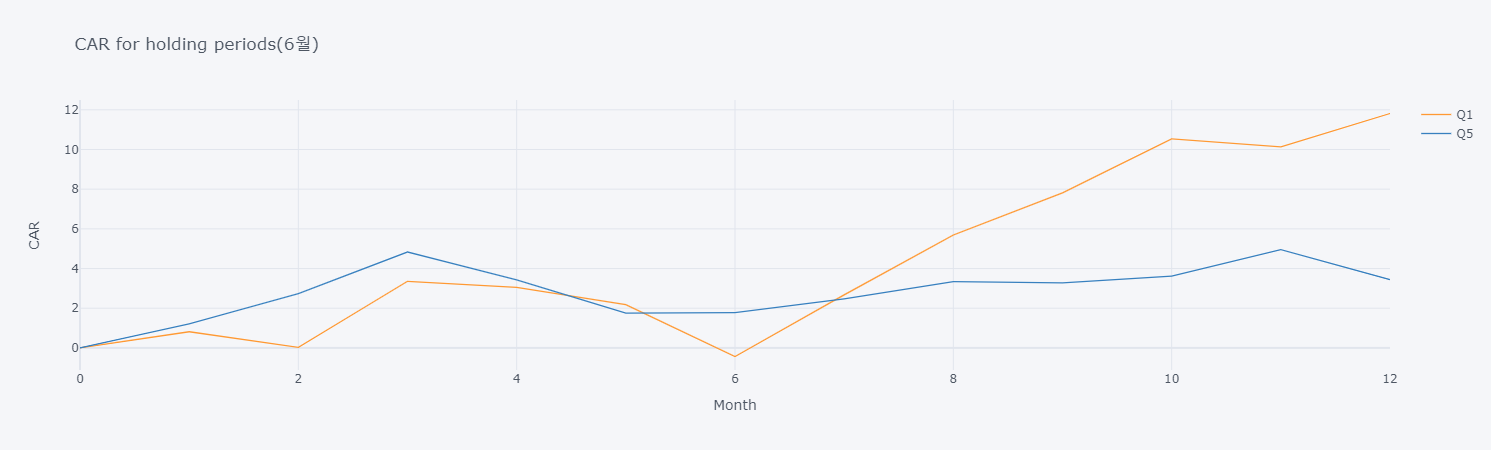

In [18]:
june_month_df.loc[:,['Q1','Q5']].iplot(kind='line',title='CAR for holding periods(6월)',xTitle='Month', yTitle = 'CAR')

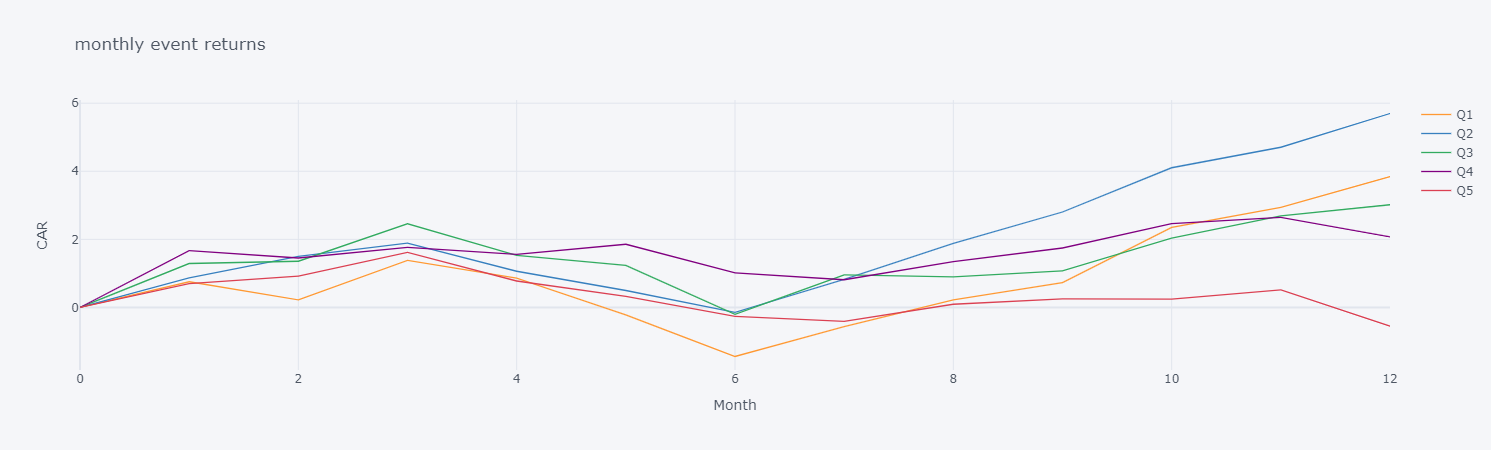

In [19]:
((march_month_df+april_month_df+june_month_df)/3).iplot(kind='line',title='monthly event returns',xTitle='Month', yTitle = 'CAR') 

그냥 3월 4월 6월 각각을 평균내준건데 이렇게하는게 맞는가에 관하여 의문이 든다. 각각의 시계열이 다르기 때문에 3월이 8년, 4월이 3년, 6월이 4년이기 때문에 평균의 평균을 구하지 않고 sum값을 총 연도 개수인 15로 나눠주었다.

In [20]:
total_march = ([get_q_returns_for_total(i,march_idx,re_march_idx).sum(1) for i in range(20,260,20)]) #8년
total_april = ([get_q_returns_for_total(i,april_idx,re_april_idx).sum(1) for i in range(20,260,20)]) #3년
total_june = ([get_q_returns_for_total(i,june_idx,re_june_idx).sum(1) for i in range(20,260,20)]) #4년

In [21]:
total_sum= [(total_march[i]+total_april[i]+total_june[i]) for i in range(0,len(total_march))]
total_ = [(i/15) for i in total_sum]
total_df = pd.DataFrame(total_)
total_df= pd.concat([ee.T,total_df]).reset_index(drop=True)
total_df

,Q1,Q2,Q3,Q4,Q5
0,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.810597,0.794301,0.991316,1.516926,0.759901
2,0.579216,1.536604,1.611625,1.676076,1.032215
3,1.453972,2.077910,2.574673,1.915734,1.509045
4,1.056786,1.484213,1.890237,1.713136,0.984898
5,-0.034989,1.010861,1.225676,1.889520,0.517469
6,-0.597629,0.477362,0.315958,1.218125,0.284953
7,0.193213,1.012069,0.859592,0.820597,0.015176
8,0.760015,1.747605,0.728843,1.219631,0.156351
9,0.776513,2.573230,0.587754,1.677075,0.452876


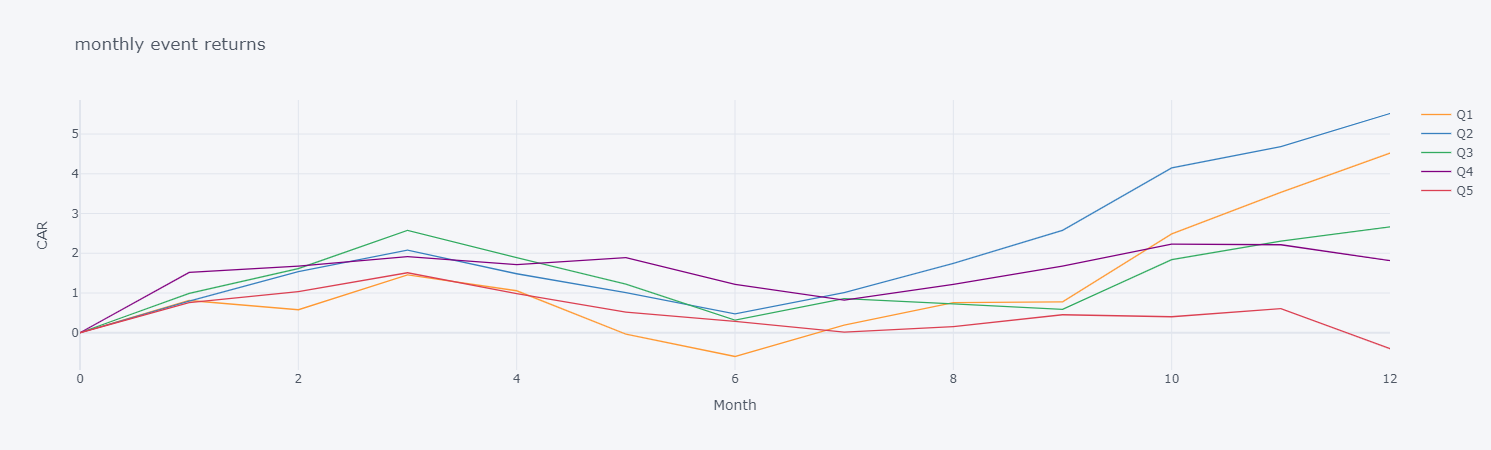

In [22]:
total_df.iplot(kind='line',title='monthly event returns',xTitle='Month', yTitle = 'CAR')

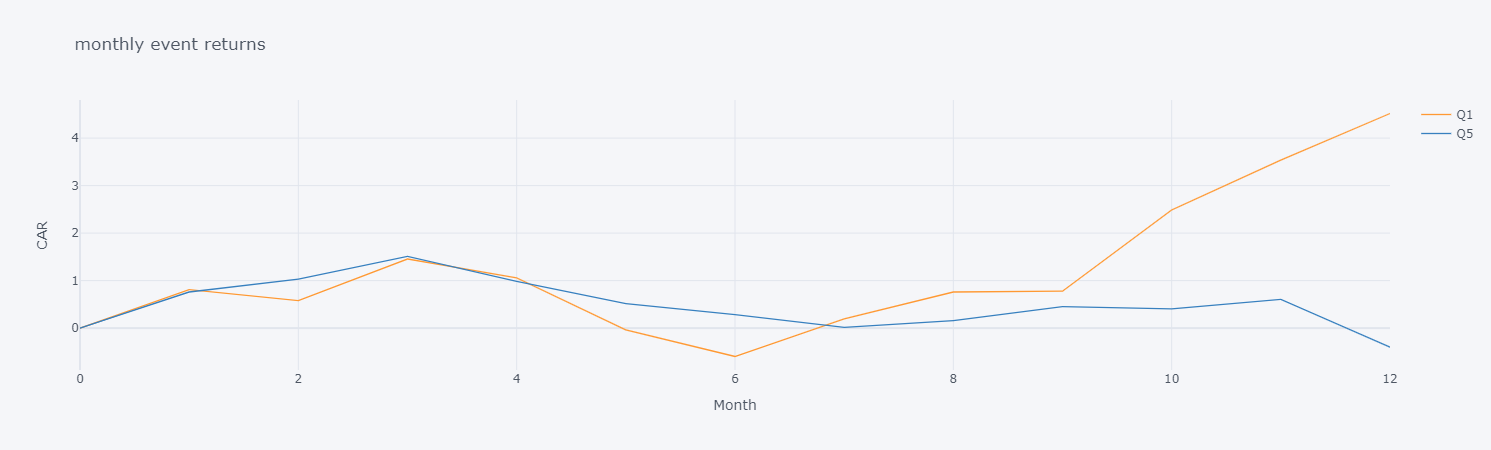

In [29]:
total_df.loc[:,['Q1','Q5']].iplot(kind='line',title='monthly event returns',xTitle='Month', yTitle = 'CAR')

수정한 결과인데 큰 차이가 보이는 것 같지는 않다.